# Cross Conformal Predictor

# 1

In [35]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

#### USPS data
(zip.data is concatenated file)

In [36]:
X = np.genfromtxt("zip.data", delimiter=" ",
usecols=np.arange(1, 257))

y = np.genfromtxt("zip.data", delimiter=" ", 
usecols=0)

In [37]:
y.shape

(9298,)

In [268]:
X.shape[1]

256

Above I check the shape of the features and the number of samples. Below I take a closer look to get a feel of the data.

In [168]:
print(X[4])

[-1.    -1.    -1.    -1.    -1.    -1.    -1.    -0.858 -0.106  0.802
 -0.21  -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.
 -1.    -1.    -0.854  0.597  1.     0.798 -0.388 -1.    -1.    -1.
 -1.    -1.    -1.    -1.    -1.    -1.    -1.    -0.481  0.6    1.
  0.653 -0.78  -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.
 -1.    -1.    -0.386  0.913  1.     0.658 -0.825 -1.    -1.    -1.
 -1.    -1.    -1.    -1.    -1.    -1.    -1.    -0.373  0.939  0.999
  0.129 -0.835 -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.
 -1.    -1.    -0.34   0.986  1.     0.007 -1.    -1.    -1.    -1.
 -1.    -1.    -1.    -1.    -1.    -1.    -1.    -0.741  0.763  1.
  0.119 -0.986 -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.
 -1.    -1.    -1.     0.271  1.     0.879 -0.871 -1.    -1.    -1.
 -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.    -0.62   0.933
  0.983 -0.349 -1.    -1.    -1.    -1.    -1.    -1.    -0.93  -0.356
  0.552  0.647  0.618 -0.633  0.148 

#### Wine data

In [40]:
wine = load_wine()

# 2

#### USPS data

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1201)

In [152]:
print('y training shape', y_train.shape)
print('x training shape', X_train.shape)

y training shape (6973,)
x training shape (6973, 256)


In [153]:
X_test.shape

(2325, 256)

#### Wine data

In [150]:
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(wine.data, wine.target, random_state=1201)
print('y training shape', y_train_w.shape)
print('x training shape', X_train_w.shape)

y training shape (133,)
x training shape (133, 13)


In [148]:
X_test_w.shape

(45, 13)

# 3

#### USPS data

In [43]:
svm1 = SVC()
svm1.fit(X_train, y_train)
scores = cross_val_score(svm1, X_train, y_train)
score = np.mean(scores)
print(score)

/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The de

0.964723864260248


#### Wine data

In [44]:
svm2 = SVC()
svm2.fit(X_train_w, y_train_w)
scores = cross_val_score(svm2, X_train_w, y_train_w)
score = np.mean(scores)
print(score)

0.4442721791559001


/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The de

# 4

#### USPS data

In [45]:
svm1.score(X_test, y_test)

0.9694623655913979

#### Wine data

In [46]:
svm2.score(X_test_w, y_test_w)

0.4666666666666667

# 5

#### USPS data

In [47]:
pipe1 = make_pipeline(MinMaxScaler(), SVC())
pipe1.fit(X_train, y_train)
param_grid = {'svc__C': [1, 10],
'svc__gamma': [1, 10]}
grid = GridSearchCV(pipe1, param_grid = param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation accuracy:", grid.best_score_)
print("Test set score:", grid.score(X_test, y_test))
print("Best parameters:", grid.best_params_)

/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Best cross-validation accuracy: 0.28438261867202064
Test set score: 0.29333333333333333
Best parameters: {'svc__C': 10, 'svc__gamma': 1}


In [50]:
pipe2 = make_pipeline(StandardScaler(), SVC())
pipe2.fit(X_train, y_train)
param_grid = {'svc__C': [1, 10],
'svc__gamma': [1, 10]}
grid = GridSearchCV(pipe2, param_grid = param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation accuracy:", grid.best_score_)
print("Test set score:", grid.score(X_test, y_test))
print("Best parameters:", grid.best_params_)

Best cross-validation accuracy: 0.20651082747741287
Test set score: 0.2172043010752688
Best parameters: {'svc__C': 10, 'svc__gamma': 1}


The two grid searches above are not great test scores, infact they are worse than the cross validation and error rate scores in part 3 and 4! 

Now I will try a C greater than 10 and also a gamma lower than 1

In [52]:
pipe2 = make_pipeline(StandardScaler(), SVC())
pipe2.fit(X_train, y_train)
param_grid = {'svc__C': [10, 100],
'svc__gamma': [0.01, 1]}
grid = GridSearchCV(pipe2, param_grid = param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation accuracy:", grid.best_score_)
print("Test set score:", grid.score(X_test, y_test))
print("Best parameters:", grid.best_params_)

Best cross-validation accuracy: 0.9330273913667001
Test set score: 0.9273118279569893
Best parameters: {'svc__C': 10, 'svc__gamma': 0.01}


#### Wine data

In [51]:
pipe3 = make_pipeline(MinMaxScaler(), SVC())
pipe3.fit(X_train_w, y_train_w)
param_grid = {'svc__C': [1, 10],
'svc__gamma': [1, 10]}
grid = GridSearchCV(pipe3, param_grid = param_grid, cv=5)
grid.fit(X_train_w, y_train_w)
print("Best cross-validation accuracy:", grid.best_score_)
print("Test set score:", grid.score(X_test_w, y_test_w))
print("Best parameters:", grid.best_params_)

Best cross-validation accuracy: 0.9924812030075187
Test set score: 0.9777777777777777
Best parameters: {'svc__C': 10, 'svc__gamma': 1}


/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The above score is good, I will consider pipe3 but first must try to a different scaler incase a slightly better score is given, or if it further confirms MinMaxScalar is most suitable.

Below I try StandardScalar

In [27]:
pipe4 = make_pipeline(StandardScaler(), SVC())
pipe4.fit(X_train_w, y_train_w)
param_grid = {'svc__C': [1, 10],
'svc__gamma': [1, 10]}
grid = GridSearchCV(pipe4, param_grid = param_grid, cv=5)
grid.fit(X_train_w, y_train_w)
print("Best cross-validation accuracy:", grid.best_score_)
print("Test set score:", grid.score(X_test_w, y_test_w))
print("Best parameters:", grid.best_params_)

Best cross-validation accuracy: 0.6466165413533834
Test set score: 0.7111111111111111
Best parameters: {'svc__C': 10, 'svc__gamma': 1}


/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


StandardScalar with parameters 1 and 10 do not work well on this data set. I will not use the pipe I have just created (pipe4) instead I will use pipe3 

# 6

#### USPS data

In [244]:
pipe2 = make_pipeline(StandardScaler(), SVC(gamma=0.01, C=10))
pipe2.fit(X_train, y_train)
pipe2.score(X_test, y_test)

0.9273118279569893

I have chosen the same gamma and C as identified in my grid search, evidently offering the best pipe over my chosen parameters

#### Wine data

In [53]:
pipe3 = make_pipeline(MinMaxScaler(), SVC(gamma=1, C=10))
pipe3.fit(X_train_w, y_train_w)
pipe3.score(X_test_w, y_test_w)

0.9777777777777777

# 7

### Understanding of cross conformal predictor as defined in notes

* each fold is the calibration set
* fit the pipe to the remaining folds (i.e. not the fold in question) which act as the "training set proper"
* use decision_function to return conformity scores for the range of postulated labels

Calculating p_values for each postulated label
* subtract 1 from each rank of labels for that sample (in that fold)
* sum the result for each fold
* add 1 to that and divide by size of training set size (plus 1)


In [5]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

## Cross Conformal Predictor for wine

In [242]:
'''
all_folds is a 3d array containing 
ranks for all labels for all samples across all folds
e.g. [0][0][0] := fold 1, label 1, test sample 1
'''
all_folds = []
for rest_index, fold_index in kf.split(X_train_w):
    test_set_rank = []
    X_rest, X_fold = X_train_w[rest_index], X_train_w[fold_index]
    y_rest, y_fold = y_train_w[rest_index], y_train_w[fold_index]
    pipe3.fit(X_rest,y_rest)
    calibration_set = pipe3.decision_function(X_fold)
    calib_len = len(calibration_set) #27
    labels_len = len(calibration_set[0])
    test_set = pipe3.decision_function(X_test_w)
    test_len = len(test_set) #45

    for i in range(labels_len): #cycle through each label
        rank_for_label = [] #list of test set label rankings in calibration set for this fold
        #Next label
        for j in range(test_len):
            count = 0
            #conformity score for postulated label: label_score
            label_score = test_set[j][i]
            for x in range(calib_len):
                if (label_score > calibration_set[x][i]):
                    count = count + 1
            rank_for_label.append(count)
        test_set_rank.append(rank_for_label)
    all_folds.append(test_set_rank)


#calculate p-values (and average false p-values)
p_values_list = [] #2d array. A list, containing a list of p_values for each label of the test sample
average_false = [] #list of average false p-value (per sample)
for x in range(len(X_test_w)):
    temp_pval = [] #pvalues for each label
    fold_index = 0
    for i in range(len(all_folds[fold_index])): #for length of labels
        to_sum = [] #sum ranks across all folds
        for j in range(5): #loop across number of folds
            fold_index = j;
            to_sum.append(all_folds[j][i][x])
        summed_value = sum(to_sum) - 5 #subtract 1 for each rank in each fold
        p_value = (summed_value + 1)/ (len(X_train_w)+1)
        temp_pval.append(p_value)
    p_values_list.append(temp_pval)
    z = y_test_w[x] #get true label from test set
    false_p = sum(temp_pval) - temp_pval[z] #sum all p values and remove p_value of the true label
    num = false_p/(len(temp_pval) - 1)
    average_false.append(num)

total_av_false = sum(average_false)/(len(X_test_w))
print("average false p_value", total_av_false)




    

average false p_value 0.29825870646766167


### Calibration Curve

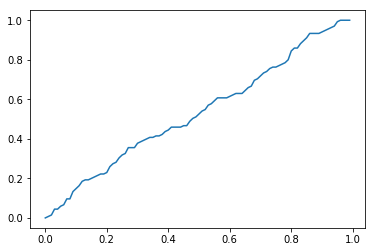

In [227]:
%matplotlib inline
n_test = X_test_w.shape[0]
eps = np.zeros(100) #significance levels
err = np.zeros(100) # the corresponding error rates
for k in range(100):
    eps[k] = k/100 # considering eps = k%
    err[k] = 0 # initializing the error rate
    for j in range(n_test):
        for i in range(len(p_values_list[j])):
            if (p_values_list[j][i] <= eps[k]): # error check
                err[k] = err[k] + 1 # count this error
    err[k] = (err[k] / n_test)/3 # number of errors -> error rate (calculate percentage across all labels)
plt.plot(eps,err)

The calibration curve above is as expected, as epsilon increases so does the error rate. It isn't a perfectly straight line but this may be because a smaller dataset is more susceptible to errors. My scaling may have potentially effected this by the parameters chosen.

### False P-values
The average false p-value: the average of the p-values for all
postulated labels in the test set except for the true labels.

I calculated this above (for time efficiency). The p_values are summed up for each label, the p_value of the true label is then subtracted. 
#### The result is 0.29

## Cross Conformal Predictor for USPS 

In [266]:
'''
like for the wine data set, all_folds is a 3d array containing 
ranks for all labels for all samples across all folds
e.g. [0][0][0] := fold 1, label 1, test sample 1
'''
all_folds = []
for rest_index, fold_index in kf.split(X_train):
    test_set_rank = []
    X_rest, X_fold = X_train[rest_index], X_train[fold_index]
    y_rest, y_fold = y_train[rest_index], y_train[fold_index]
    pipe2.fit(X_rest,y_rest)
    calibration_set = pipe2.decision_function(X_fold)
    calib_len = len(calibration_set)
    labels_len = len(calibration_set[0])
    test_set = pipe2.decision_function(X_test)
    test_len = len(test_set)

    for i in range(labels_len): #cycle through each label
        rank_for_label = [] #list of test set label rankings in calibration set for this fold
        #Next label
        for j in range(test_len):
            count = 0
            #conformity score for postulated label: label_score
            label_score = test_set[j][i]
            for x in range(calib_len):
                if (label_score > calibration_set[x][i]):
                    count = count + 1
            rank_for_label.append(count)
        test_set_rank.append(rank_for_label)
    all_folds.append(test_set_rank)

#calculate p-values (and average false p-values)
p_values_list = [] #2d array. A list, containing a list of p_values for each label of the test sample
average_false = [] #list of average false p-value (per sample)
for x in range(len(X_test)):
    temp_pval = [] #pvalues for each label
    fold_index = 0
    for i in range(len(all_folds[fold_index])): #for length of labels
        to_sum = [] #sum ranks across all folds
        for j in range(5): #loop across number of folds
            fold_index = j;
            to_sum.append(all_folds[j][i][x])
        summed_value = sum(to_sum) - 5 #subtract 1 for each rank in each fold
        p_value = (summed_value + 1)/ (len(X_train)+1)
        temp_pval.append(p_value)
    p_values_list.append(temp_pval)
    z = y_test[x].astype(int) #get true label from test set
    false_p = sum(temp_pval) - temp_pval[z] #sum all p values and remove p_value of the true label
    num = false_p/(len(temp_pval) - 1)
    average_false.append(num)
    
total_av_false = sum(average_false)/(len(X_test))
print("average false p_value", total_av_false)




    

average false p_value 0.4508015811587596


### Calibration Curve

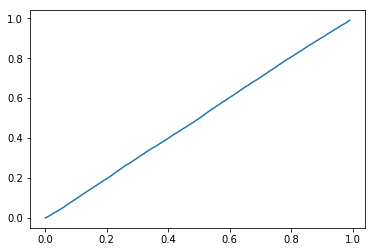

In [256]:
%matplotlib inline
n_test = X_test.shape[0]
eps = np.zeros(100) #significance levels
err = np.zeros(100) # the corresponding error rates
for k in range(100):
    eps[k] = k/100 # considering eps = k%
    err[k] = 0 # initializing the error rate
    for j in range(n_test):
        for i in range(len(p_values_list[j])):
            if (p_values_list[j][i] <= eps[k]): # error check
                err[k] = err[k] + 1 # count this error
    err[k] = (err[k] / n_test)/10 # number of errors -> error rate (calculate percentage across all labels)
plt.plot(eps,err)

My calibration curve for this data set is considerably better than the previous smaller data set. Maybe because this set is larger, errors are less influencial than on smaller data sets where a single outlier can effect a whole trend.

### False P-values
The average false p-value: the average of the p-values for all
postulated labels in the test set except for the true labels.

Again, like for the wine data set, I calculated this above (for time efficiency). The p_values are summed up for each label, the p_value of the true label is then subtracted. 
#### The result is 0.45